In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import random

In [2]:
x_min=-5
x_max=5
w=1
steps=100
h=1
m=1
g=1
k=1
mu=1
N=10
c1=1
c2=1
c3=1
v=1
k=1
phi=1
u=1

grid=np.linspace(x_min,x_max, steps)
V=.5*m*(w**2)*(grid**2)
deltax=(x_max-x_min)/steps

# Computing S_0

In [3]:
def calc_s0(psi_init, h, m, g, mu, x_max, x_min, steps,x_vec,beta,potential):
    
    #laplacian
    laps=[]
    for i in range(1,len(psi_init)-1):
        laplacian=-h**2/(2*m)*(psi_init[i+1]-2*psi_init[i]+psi_init[i-1])*psi_init[i]/((x_max-x_min)/steps)**2
        laps.append(laplacian.copy())
    laps_term=laps*np.conjugate(psi_init[1:-1])
    laps_int=integrate.simpson(laps_term, x=x_vec[1:-1])
    print("Laplacian Term: ", laps_int)

    #Potential term
    potential_term=potential*np.conjugate(psi_init)*psi_init
    potential_integrate=integrate.simpson(potential_term, x=x_vec)
    print("Potential Term: ", potential_integrate)

    #Norm^4
    norm4=(np.conjugate(psi_init)*psi_init)**2
    #print(norm4)
    norm4_term=integrate.simpson(norm4, x=x_vec)
    print("Norm^4 Term: ", norm4_term)

    #Norm^2 (part of number operation)
    norm2=np.conjugate(psi_init)*psi_init #I feel like this needs to explicitly be something times complex conj...
    norm2_term=integrate.simpson(norm2, x=x_vec)
    print("Norm^2 Term: ", norm2_term)

    S_0=-beta*(-laps_int+potential_integrate+(g/2)*norm4_term)-mu*norm2_term 
    #print(S_0)

    return S_0

In [4]:
# s0_init=calc_s0(psi_0, h, m, g, mu, x_max, x_min, steps,grid)
# print(s0_init)

In [5]:
# # PERTURBATION
# rand=random.choice([0,1])

# if rand==0:
#     print("Generating density perturbation...")
#     psi=psi_0*(1+c1*v*np.sin(k*grid+phi))
# if rand==1:
#     print("Generating phase perturbation...")
#     psi=psi_0*np.exp((1j*c2*v*np.sin(k*grid+phi)))

# # Vary particle number
# psi=(1+c3*u)*psi

In [6]:
# # Calculate reduced energy of perturbed field
# s0_final=calc_s0(psi, h, m, g, mu, x_max, x_min, steps,grid)

In [ ]:
def check_func(s0_final, s0_init, psi_new,psi_old):
    a=np.exp(s0_final-s0_init)
    print("value of a is: ", a)

    if a>=1:
        pass
        print("a does not meet acceptance criteria. Perturbation rejected.")
        accepted_s=s0_init
        psi_out=psi_old
    if a<1:
        rand=random.random() #generate random number between 0,1
        print("rand value is: ",rand)
        if rand<=a:
            psi_out=psi_new
            print("a meets acceptance criteria. Perturbation accepted.")
            accepted_s=s0_final
        else:
            pass
            print("a meets acceptance criteria. Perturbation rejected.")
            accepted_s=s0_init
            psi_out=psi_old
    return accepted_s, psi_out

In [8]:
# accepted_s=check_func(s0_final, s0_init)
# entropy_store.append(accepted_s)

In [9]:
# LOOP

iter=0
entropy_store=[]
psi_store=[]
psi_sq_store=[]
T=1
beta=1/k*T
psi_0=(1/np.pi**.25)*np.exp(-0.5*grid**2)
V=.5*m*(w**2)*(grid**2)

psi_store.append(psi_0.copy())

while iter<10:

    print("Iteration: ", iter)

    #calculate inital entropy
    s0_init=calc_s0(psi_0, h, m, g, mu, x_max, x_min, steps,grid,beta,V)
    print("Initial reduced entropy: ",s0_init)

    # PERTURBATION
    rand=random.choice([0,1])

    if rand==0:
        #print("Generating density perturbation...")
        psi=psi_0*(1+c1*v*np.sin(k*grid+phi))
    if rand==1:
        #print("Generating phase perturbation...")
        psi=psi_0*np.exp((1j*c2*v*np.sin(k*grid+phi)))

    # Vary particle number
    psi=(1+c3*u)*psi
    print("new psi is:",psi)

    # Calculate reduced energy of perturbed field
    s0_final=calc_s0(psi, h, m, g, mu, x_max, x_min, steps,grid,beta,V)
    print("Final reduced entropy: ", s0_final)

    # Accept or reject perturbation
    accepted_s, psi_0=check_func(s0_final, s0_init, psi, psi_0)
    entropy_store.append(accepted_s)
    psi_store.append(psi_0)
    psi_sq=np.conjugate(psi_0)*psi_0
    psi_sq_store.append(psi_sq.copy())
    
    iter+=1

Iteration:  0
Laplacian Term:  0.2082269543852865
Potential Term:  0.24999999997908753
Norm^4 Term:  0.3989422804014328
Norm^2 Term:  0.9999999999983733
Initial reduced entropy:  -1.2412441857928909
new psi is: [9.83522825e-06 1.55707686e-05 2.42536001e-05 3.71584355e-05
 5.59762465e-05 8.28774960e-05 1.20543265e-04 1.72134575e-04
 2.41160549e-04 3.31198017e-04 4.45411960e-04 5.85832814e-04
 7.52369036e-04 9.41579122e-04 1.14530349e-03 1.34936954e-03
 1.53273497e-03 1.66762089e-03 1.72139421e-03 1.66116207e-03
 1.46220119e-03 1.12140905e-03 6.76870394e-04 2.34317390e-04
 6.70230876e-07 3.23945415e-04 1.73762024e-03 5.00610786e-03
 1.11664573e-02 2.15599445e-02 3.78461188e-02 6.19914007e-02
 9.62247761e-02 1.42954713e-01 2.04644265e-01 2.83645344e-01
 3.81998108e-01 5.01206856e-01 6.42009073e-01 8.04158598e-01
 9.86246534e-01 1.18558370e+00 1.39816587e+00 1.61873741e+00
 1.84096088e+00 2.05768982e+00 2.26133137e+00 2.44427445e+00
 2.59935105e+00 2.72029231e+00 2.80213985e+00 2.84157520e

[-1.2412441857928909, -1.2412441857928909, -1.2412441857928909, -1.2412441857928909, -1.2412441857928909, -1.2412441857928909, -1.2412441857928909, -1.2412441857928909, -1.2412441857928909, -1.2412441857928909]


Text(0, 0.5, 'Reduced entropy')

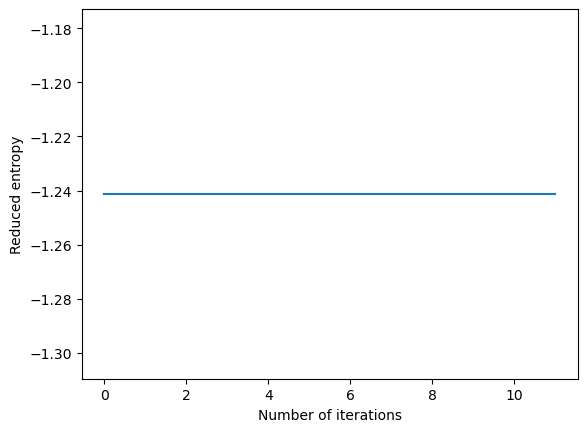

In [10]:
print(entropy_store)
fig=plt.figure()
plt.plot(np.linspace(0,iter+1,iter), entropy_store)
plt.xlabel("Number of iterations")
plt.ylabel("Reduced entropy")
#plt.xlim(0,20)

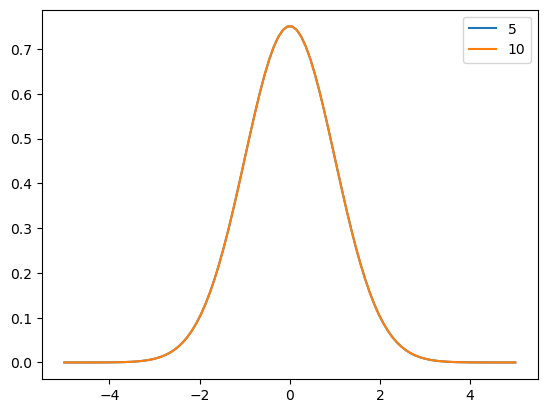

In [11]:
plt.figure()
#plt.plot(grid, np.real(psi_store[0]), label="0")
plt.plot(grid, np.real(psi_store[5]), label="5")
plt.plot(grid, np.real(psi_store[10]), label="10")
#plt.plot(grid, np.real(psi_store[15]), "--",label="15")
plt.legend()
plt.show()

In [12]:
print(psi_store[-1])

[2.79918439e-06 4.61483942e-06 7.53096370e-06 1.21650358e-05
 1.94511420e-05 3.07854632e-05 4.82297663e-05 7.47917159e-05
 1.14804976e-04 1.74436275e-04 2.62350425e-04 3.90567063e-04
 5.75543741e-04 8.39517842e-04 1.21213335e-03 1.73236638e-03
 2.45074413e-03 3.43182449e-03 4.75686737e-03 6.52658341e-03
 8.86379327e-03 1.19157730e-02 1.58560022e-02 2.08849794e-02
 2.72297265e-02 3.51415881e-02 4.48919391e-02 5.67654678e-02
 7.10507969e-02 8.80283500e-02 1.07955568e-01 1.31049813e-01
 1.57469569e-01 1.87294814e-01 2.20507689e-01 2.56974838e-01
 2.96432857e-01 3.38478396e-01 3.82564304e-01 4.28002998e-01
 4.73977857e-01 5.19562946e-01 5.63750791e-01 6.05487293e-01
 6.43712257e-01 6.77403443e-01 7.05621648e-01 7.27554060e-01
 7.42553103e-01 7.50168185e-01 7.50168185e-01 7.42553103e-01
 7.27554060e-01 7.05621648e-01 6.77403443e-01 6.43712257e-01
 6.05487293e-01 5.63750791e-01 5.19562946e-01 4.73977857e-01
 4.28002998e-01 3.82564304e-01 3.38478396e-01 2.96432857e-01
 2.56974838e-01 2.205076

In [13]:
psi_0=(1/np.pi**.25)*np.exp(-0.5*grid**2)
laps=[]
for i in range(1,len(psi_0)-1):
    laplacian=-h**2/(2*m)*(np.conjugate(psi_0[i])*(psi_0[i+1]-2*psi_0[i]+psi_0[i-1])*psi_0[i]/((x_max-x_min)/steps)**2)
    laps.append(laplacian)
print(laps)

[-1.171820546517271e-15, -4.87170609398204e-15, -1.9623473794976712e-14, -7.65814856494732e-14, -2.8953515740063103e-13, -1.0604326140616415e-12, -3.762197607995366e-12, -1.2928466657732595e-11, -4.3029549262435907e-11, -1.3869646946397638e-10, -4.3291629161050975e-10, -1.3083971806670868e-09, -3.828470089128094e-09, -1.0844479585214145e-08, -2.9732537942984357e-08, -7.889152439717057e-08, -2.025495435400763e-07, -5.030984755974586e-07, -1.2086565951727394e-06, -2.8078600627606928e-06, -6.305934146344166e-06, -1.3686258674395206e-05, -2.869578300607084e-05, -5.809747789840961e-05, -0.0001135203942953197, -0.00021394054276535466, -0.0003885794298016577, -0.0006795463641822891, -0.001142846126953128, -0.0018454909991368089, -0.0028556256833441452, -0.004222236497044733, -0.005941795437164759, -0.007911730224914329, -0.009875265021212547, -0.011368584767156688, -0.011688010562982425, -0.009899379724562422, -0.004910912452871726, 0.004378187003866441, 0.01885900024964648, 0.038953665466887

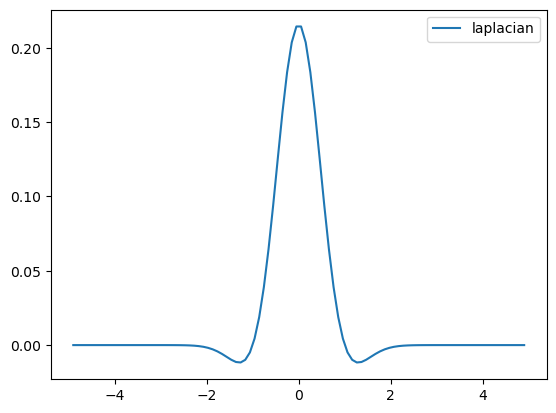

In [14]:
plt.figure()
#plt.plot(grid,psi_0, label="psi_0")
plt.plot(grid[1:-1],laps,label="laplacian")
plt.legend()
plt.show()

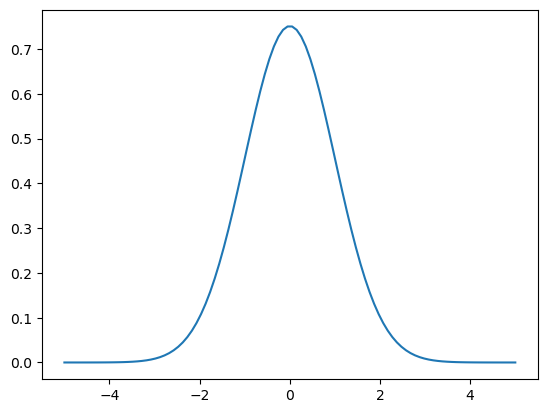

In [15]:
plt.figure()
plt.plot(grid,psi_0, label="psi_0")

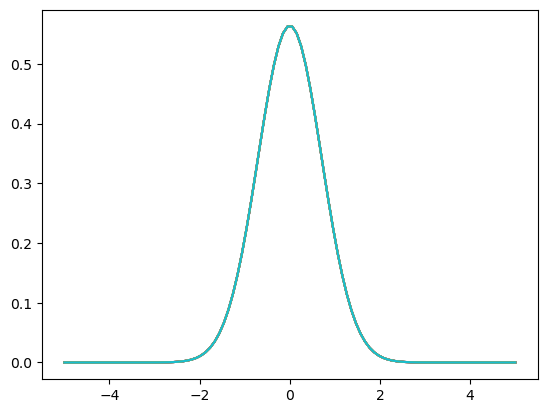

In [16]:
#print(psi_sq_store)
plt.figure()
for i in range(0,len(psi_sq_store)):
    plt.plot(grid,psi_sq_store[i])